In [16]:
# import necessary libraries
import pyodbc
import pandas as pd
import numpy
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
ssConn = pyodbc.connect(
    "Driver={SQL Server Native Client 11.0};"
    "Server=DESKTOP-G4V2OAO\SQLEXPRESS;"
    "Database=HealthStrategy;"
    "Trusted_Connection=yes;"
)

In [18]:
sql_query = """
SELECT *
FROM dbo.Dummy_Data_BCP_05_Staging
"""

In [19]:
sql_df = pd.read_sql_query(sql_query, ssConn)

In [20]:
sql_df

,RECORDIDENTIFIER,CARRIERID,ACCOUNTIDGROUPEXTENSIONCODE,GROUPID,CARDHOLDERMEMBERID,ALTERNATEID,CAREFACILITYID,PERSONCODE,CARDHOLDERLASTNAME,CARDHOLDERFIRSTNAME,...,PD6CLIENTTOTALOTHERAMOUNT,PD6BUYTOTALOTHERAMOUNT,DIAGNOSISCODEQUALIFIER,DIAGNOSISCODE,FILLER4,Multi_Source_Code,Brand_Name_Code,Effective_Date,AWP_Unit_Price,BG_Ind
0,4,0261,HB2,APBC1200/2650,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B
1,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B
2,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B
3,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,02,J301,,None,None,None,NaN,B
4,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,02,J301,,None,None,None,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9722,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B
9723,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B
9724,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B
9725,4,0261,214013,214013B1A1,,,,,,,...,00000000{,00000000{,,,,None,None,None,NaN,B


In [21]:
sql_df.describe()

,PAYABLEQUANTITY,DAYSSUPPLY,INGREDIENTCOSTPAYABLE,AWP,AWP_Unit_Price
count,9727.000000,9727.000000,9727.000000,9727.000000,11.000000
mean,64.305511,40.222782,148.419036,30.383122,3.382015
std,296.184253,30.509226,1002.951697,424.691937,0.069112
min,0.200000,1.000000,0.000000,0.000000,3.309830
25%,28.000000,28.000000,3.350000,0.843200,3.309830
50%,30.000000,30.000000,10.670000,2.562700,3.442170
75%,90.000000,84.000000,34.000000,5.964715,3.442170
max,25776.000000,180.000000,46458.100000,27699.410000,3.442170


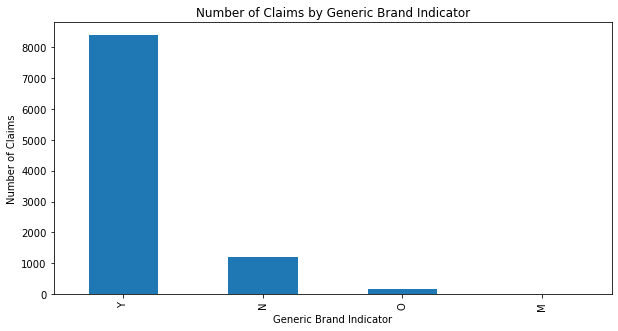

In [22]:
sql_df.GENERICBRANDINDICATOR.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Claims by Generic Brand Indicator")
plt.ylabel("Number of Claims")
plt.xlabel("Generic Brand Indicator")
plt.show()

In [7]:
sql_query = """
SELECT
COUNT(*) AS TotalNumberOfPaidRecords
, SUM(INGREDIENTCOSTPAYABLE) AS TotalIngredientCostPayable

FROM dbo.Dummy_Data_BCP_05_Staging

WHERE CLAIMSTATUSFLAG = 'P'
"""
excel_df = pd.read_sql_query(sql_query, ssConn)
excel_df

,TotalNumberOfPaidRecords,TotalIngredientCostPayable
0,9050,1340781.38


In [9]:
excel_filename = 'C:\GITProjects\HS-BCP-Solution\ExcelReport.xlsx'
with pd.ExcelWriter(excel_filename) as writer:
    excel_df.to_excel(writer,sheet_name='HealthStrategyReport')

In [10]:
del sql_df
del excel_df